In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv("data/HousingData.csv", sep=';')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2


### 1 - Nombre des lignes et des colonnes

In [3]:
df.shape

(518, 14)

### 2 - La distribution de MEDV

In [4]:
import seaborn as sns

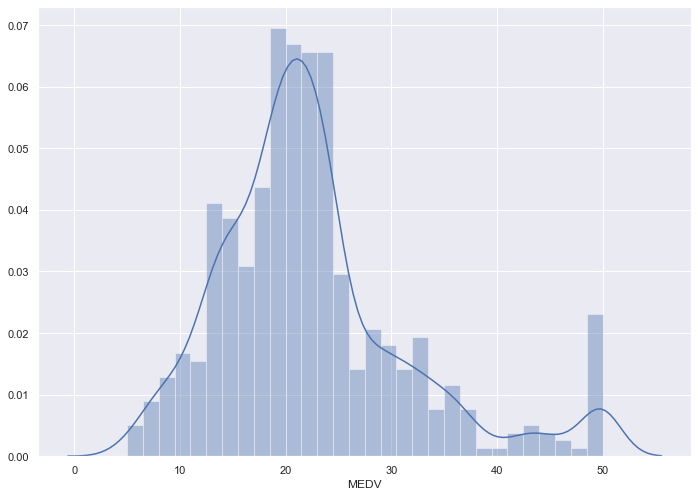

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

### 3 - La matrice de corrélation

In [6]:
matrice_corre = df.corr()
matrice_corre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.187087,0.403496,-0.052359,0.417602,-0.213960,0.348009,-0.374696,0.625559,0.581732,0.268657,-0.381250,0.440513,-0.385045
ZN,-0.187087,1.000000,-0.524530,-0.033754,-0.510450,0.324997,-0.560256,0.652598,-0.302708,-0.304721,-0.419530,0.168378,-0.413585,0.376718
INDUS,0.403496,-0.524530,1.000000,0.062313,0.764435,-0.381841,0.628905,-0.711435,0.606267,0.732125,0.373453,-0.360758,0.584172,-0.473261
CHAS,-0.052359,-0.033754,0.062313,1.000000,0.075911,0.108210,0.075950,-0.094972,0.004906,-0.028929,-0.117031,0.049883,-0.048712,0.184086
NOX,0.417602,-0.510450,0.764435,0.075911,1.000000,-0.298614,0.723634,-0.769159,0.610696,0.667235,0.182062,-0.379753,0.578813,-0.423280
RM,-0.213960,0.324997,-0.381841,0.108210,-0.298614,1.000000,-0.246250,0.202251,-0.200706,-0.282553,-0.364361,0.125036,-0.611190,0.696271
AGE,0.348009,-0.560256,0.628905,0.075950,0.723634,-0.246250,1.000000,-0.736744,0.449046,0.499174,0.270673,-0.268292,0.606363,-0.398429
DIS,-0.374696,0.652598,-0.711435,-0.094972,-0.769159,0.202251,-0.736744,1.000000,-0.494936,-0.534358,-0.224440,0.291545,-0.490227,0.246556
RAD,0.625559,-0.302708,0.606267,0.004906,0.610696,-0.200706,0.449046,-0.494936,1.000000,0.910815,0.442535,-0.443598,0.473155,-0.371824
TAX,0.581732,-0.304721,0.732125,-0.028929,0.667235,-0.282553,0.499174,-0.534358,0.910815,1.000000,0.439727,-0.441059,0.529336,-0.458363


### 4 - Les valeurs manquantes avec leurs proportions

In [7]:
def features_nan_detect(df, nbr_entries):
    features_nan = []
    print("--------------------------------------------")
    print("les features qui contiennent des valeurs manquantes")
    for i in df.columns:
        x=df[i].isna().sum()
        if x != 0:
            features_nan.append(i)
            print(i, "---Nombre", x)
            print(i, "---Proportion", x/nbr_entries * 100)
    return features_nan

In [8]:
features_nan = features_nan_detect(df, df.shape[0])

--------------------------------------------
les features qui contiennent des valeurs manquantes
CRIM ---Nombre 21
CRIM ---Proportion 4.054054054054054
ZN ---Nombre 20
ZN ---Proportion 3.861003861003861
INDUS ---Nombre 21
INDUS ---Proportion 4.054054054054054
CHAS ---Nombre 20
CHAS ---Proportion 3.861003861003861
RM ---Nombre 1
RM ---Proportion 0.19305019305019305
AGE ---Nombre 20
AGE ---Proportion 3.861003861003861
DIS ---Nombre 1
DIS ---Proportion 0.19305019305019305
RAD ---Nombre 2
RAD ---Proportion 0.3861003861003861
TAX ---Nombre 2
TAX ---Proportion 0.3861003861003861
LSTAT ---Nombre 21
LSTAT ---Proportion 4.054054054054054


In [9]:
#Remplacer les valeurs manquantes
def features_nan_replace(df, features_tabl):
    print("Remplacement des valeurs manquantes")
    for i in features_tabl:
        for index, row in df.iterrows():
            if pd.isna(row[i]):
                t = df[i].dtype
                if t in ['float64', 'int64']:
                    df.loc[index, i] = df[i].median()
                else :
                    df.loc[index, i] = df[i].mode().iloc[0]

In [10]:
features_nan_replace(df, features_nan)

Remplacement des valeurs manquantes


### 5 - X, Y, X_train, X_test, y_train et y_test

In [11]:
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
features = ['LSTAT', 'RM', 'NOX', 'PTRATIO', 'INDUS', 'DIS', 'ZN']
X = df[features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6 - Modele de Regression Linéaire

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Y predicte
y_predicted = model.predict(X_test)

In [16]:
#Calcul du score
score = model.score(X_test, y_test)
score

0.7218193451594848

In [17]:
#RMSE
def calcul_rmse(y_t,y_p):
    s=0
    for m,n in zip(y_t,y_p):
        s+=(m-n)**2
    return np.sqrt(s/len(y_p))

In [18]:
rmse = calcul_rmse(y_test, y_predicted)
print(rmse)

4.889838364519845


### 7 - RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

C:\Users\mdele\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
#score
score = model.score(X_test, y_test)
score

0.8442184723319924

In [22]:
#RMSE
y_predicted = model.predict(X_test)
rmse = calcul_rmse(y_test, y_predicted)
print(rmse)

3.6592242066962477


### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
#score
score = model.score(X_test, y_test)
score

0.8940086685149397

In [26]:
#RMSE
y_predicted = model.predict(X_test)
rmse = calcul_rmse(y_test, y_predicted)
print(rmse)

3.0183264879079763


## *Le meilleur modele est gradient boosting